**Gestational Diabetes Dataset**

---



Source: https://www.kaggle.com/datasets/rasooljader/gestational-diabetes

In [23]:
import pandas as pd
df=pd.read_csv('/content/Gestational Diabetes.csv')
df

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17.0,1.0,48.0,165.0,17.6,0,0
1,17.0,1.0,49.0,145.0,23.3,0,0
2,17.0,1.0,50.0,140.0,25.5,0,0
3,17.0,1.0,50.0,145.0,23.8,0,0
4,17.0,1.0,49.0,146.0,23.0,0,0
...,...,...,...,...,...,...,...
1007,35.0,3.0,89.0,159.0,35.2,1,1
1008,41.0,4.0,87.0,165.0,32.0,0,0
1009,34.0,2.0,67.0,160.0,26.2,1,0
1010,33.0,3.0,65.0,167.0,23.3,0,1


In [24]:
df.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17.0,1.0,48.0,165.0,17.6,0,0
1,17.0,1.0,49.0,145.0,23.3,0,0
2,17.0,1.0,50.0,140.0,25.5,0,0
3,17.0,1.0,50.0,145.0,23.8,0,0
4,17.0,1.0,49.0,146.0,23.0,0,0


**Exercise 1: Analyzing a Health-Related Dataset**

---



In [25]:
 # Calculate basic descriptive statistics
 print("Mean:\n", df.mean())
 print("\nMedian:\n", df.median())
 print("\nMode:\n", df.mode().iloc[0])
 print("\nStandard Deviation:\n", df.std())
 print("\nVariance:\n", df.var())
 # Additional descriptive statistics
 print("\nRange:\n", df.max() - df.min())
 print("\nSkewness:\n", df.skew())
 print("\nKurtosis:\n", df.kurt())

Mean:
 Age              30.357708
Pregnancy No      2.517787
Weight           72.988142
Height          158.154150
BMI              29.256818
Heredity          0.226285
Prediction        0.214427
dtype: float64

Median:
 Age              30.0
Pregnancy No      2.0
Weight           70.0
Height          158.0
BMI              28.9
Heredity          0.0
Prediction        0.0
dtype: float64

Mode:
 Age              23.0
Pregnancy No      2.0
Weight           65.0
Height          160.0
BMI              31.6
Heredity          0.0
Prediction        0.0
Name: 0, dtype: float64

Standard Deviation:
 Age              7.022960
Pregnancy No     1.530656
Weight          12.552712
Height           7.367421
BMI              5.092321
Heredity         0.418632
Prediction       0.410627
dtype: float64

Variance:
 Age              49.321968
Pregnancy No      2.342908
Weight          157.570581
Height           54.278885
BMI              25.931734
Heredity          0.175253
Prediction        0.168615
dtyp

In [26]:
import scipy.stats as stats

# Select the feature for analysis
feature = 'BMI'  # Replace with your desired feature

# Define the hypothesized value
hypothesized_value = 29.42699440206 # Replace with your hypothesized value

# Extract the data for the selected feature
data = df[feature]

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(data, hypothesized_value)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine if the hypothesis should be rejected
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. The average BMI is significantly different from the hypothesized value.")
else:
    print("The null hypothesis is accepted. There is no significant difference between the average BMI and the hypothesized value.")

# Calculate the 95% confidence interval
confidence_level = 0.95
degrees_of_freedom = len(data) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_of_freedom, loc=data.mean(), scale=stats.sem(data))

# Print the confidence interval
print(f"95% Confidence Interval for the mean of {feature}: {confidence_interval}")


T-statistic: -1.063098123519172
P-value: 0.2879913138277411
The null hypothesis is accepted. There is no significant difference between the average BMI and the hypothesized value.
95% Confidence Interval for the mean of BMI: (28.942699440206496, 29.57093692342987)


**Exercise 2: Exploring Regression Analysis on a New Dataset**

---



In [27]:
import statsmodels.formula.api as smf

# Define the regression model
model = smf.ols('Prediction ~ Age', data=df)

# Fit the model
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Prediction   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     132.6
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           6.32e-29
Time:                        14:35:13   Log-Likelihood:                -472.28
No. Observations:                1012   AIC:                             948.6
Df Residuals:                    1010   BIC:                             958.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3903      0.054     -7.243      0.0

# Explanation of the values:

---



# R-squared:
This value indicates the proportion of variance in the dependent variable (Prediction) that is explained by the independent variable (Age).

A higher R-squared value suggests a stronger relationship between the variables.

# Adjusted R-squared:
This is a modified version of R-squared that accounts for the number of predictors in the model. It helps to prevent overfitting.

# Coefficients:
These values represent the estimated change in the dependent variable (Prediction) for a one-unit change in the independent variable (Age).

The intercept represents the predicted value of the dependent variable when the independent variable is zero.

# P-values:
 These values indicate the statistical significance of the coefficients. A p-value less than the significance level (usually 0.05) suggests that the coefficient is statistically significant.

# Standard Errors:
These values indicate the variability of the estimated coefficients.

# F-statistic and p-value:
These values test the overall significance of the regression model. A low p-value indicates that the model is statistically significant.


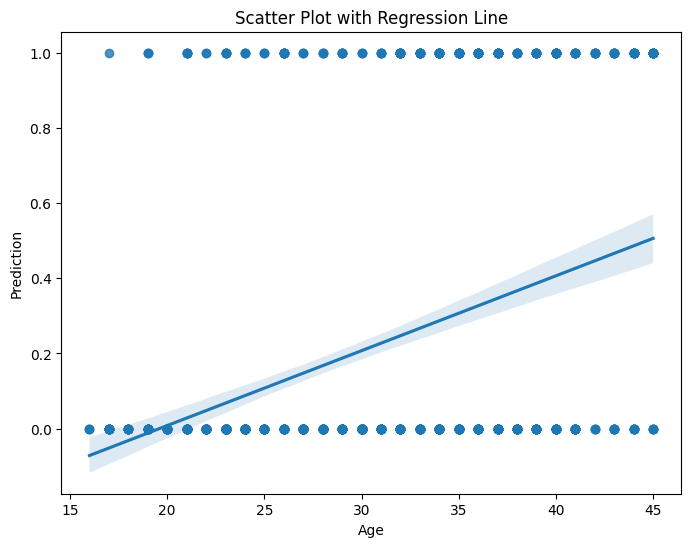

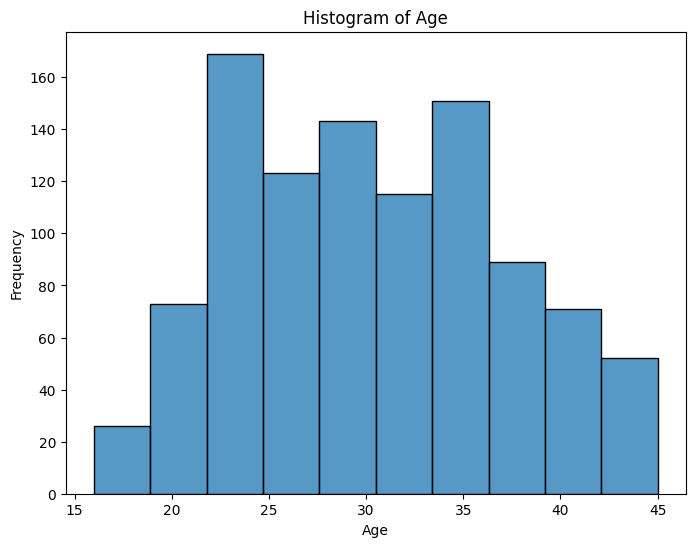

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Prediction', data=df)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Age')
plt.ylabel('Prediction')
plt.show()

# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
